## Intro to variables of dataset (need change i just copied)

<br>Age | Objective Feature | age | int (days)
<br>Height | Objective Feature | height | int (cm) |
<br>Weight | Objective Feature | weight | float (kg) |
<br>Gender | Objective Feature | gender | categorical code |
<br>Systolic blood pressure | Examination Feature | ap_hi | int |
<br>Diastolic blood pressure | Examination Feature | ap_lo | int |
<br>Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
<br>Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
<br>Smoking | Subjective Feature | smoke | binary |
<br>Alcohol intake | Subjective Feature | alco | binary |
<br>Physical activity | Subjective Feature | active | binary |
<br>Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


## 1. Preparing Data

### 1.1 Import Essential Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
cardioData = pd.read_csv('cardio_train.csv',delimiter=';')
cardioData

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 1.2 Rename data so its easier to read on the table

In [3]:
cardioData.rename(columns = {'ap_hi': 'Systolic_BP'}, inplace = True)
cardioData.rename(columns = {'ap_lo': 'Diastolic_BP'}, inplace = True)
cardioData.rename(columns = {'gluc': 'Glucose'}, inplace = True)
cardioData.rename(columns = {'alco': 'Alcohol'}, inplace = True)
cardioData.rename(columns = {'cardio': 'Cardio_Patient'}, inplace = True)
cardioData.rename(columns = {'active': 'Physically Active'}, inplace = True)
cardioData.columns = cardioData.columns.str.upper()
cardioData




,ID,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICALLY ACTIVE,CARDIO_PATIENT
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Issues obseved from current dataset :
- Age is in a weird value 
- Since we have height and weight, we can also calculate BMI to help us analyse the pattern
- Categorical data is in integer value hard to tell

### 1.3 Organising Data Set


##### 1.3a To understand the data better, we want to convert the age data from days to years.

In [4]:
#check the data format for age
print(cardioData['AGE'].head())

0    18393
1    20228
2    18857
3    17623
4    17474
Name: AGE, dtype: int64


In [5]:
# create function to convert days to years
def days_to_years(days):
    days_per_year = 365.25
    return days / days_per_year

# apply function to the 'age' column
cardioData['AGE'] = cardioData['AGE'].apply(days_to_years)

# round age to nearest interger
cardioData['AGE'] = cardioData['AGE'].round().astype(int)

#check if age data updated
print(cardioData['AGE'].head())


0    50
1    55
2    52
3    48
4    48
Name: AGE, dtype: int32


#### 1.3b Introducing BMI to data set

In [6]:
# Calculate BMI
cardioData['BMI'] = cardioData['WEIGHT'] / ((cardioData['HEIGHT'] / 100) ** 2)
cardioData

,ID,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICALLY ACTIVE,CARDIO_PATIENT,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


#### 1.3c Change the catergorical value to make it easier to read on the table

In [7]:
cardioData['GENDER'] = cardioData['GENDER'].replace({1: 'Female', 2: 'Male'})
cardioData['SMOKE'] = cardioData['SMOKE'].replace({0: 'No', 1: 'Yes'})
cardioData['CHOLESTEROL'] = cardioData['CHOLESTEROL'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
cardioData['GLUCOSE'] = cardioData['GLUCOSE'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
cardioData['PHYSICALLY ACTIVE'] = cardioData['PHYSICALLY ACTIVE'].replace({0: 'No', 1: 'Yes'})
cardioData['CARDIO_PATIENT'] = cardioData['CARDIO_PATIENT'].replace({0: 'No', 1: 'Yes'})
cardioData['ALCOHOL'] = cardioData['ALCOHOL'].replace({0: 'No', 1: 'Yes'})
cardioData

,ID,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICALLY ACTIVE,CARDIO_PATIENT,BMI
0,0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,21.967120
1,1,55,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,Yes,34.927679
2,2,52,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,Yes,23.507805
3,3,48,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.710479
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,Male,168,76.0,120,80,Normal,Normal,Yes,No,Yes,No,26.927438
69996,99995,62,Female,158,126.0,140,90,Above Normal,Above Normal,No,No,Yes,Yes,50.472681
69997,99996,52,Male,183,105.0,180,90,Well Above Normal,Normal,No,Yes,No,Yes,31.353579
69998,99998,61,Female,163,72.0,135,80,Normal,Above Normal,No,No,No,Yes,27.099251


### 1.4 Analysing the data set visually

Identify which are int & cat data

In [8]:
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 70000 non-null  int64  
 1   AGE                70000 non-null  int32  
 2   GENDER             70000 non-null  object 
 3   HEIGHT             70000 non-null  int64  
 4   WEIGHT             70000 non-null  float64
 5   SYSTOLIC_BP        70000 non-null  int64  
 6   DIASTOLIC_BP       70000 non-null  int64  
 7   CHOLESTEROL        70000 non-null  object 
 8   GLUCOSE            70000 non-null  object 
 9   SMOKE              70000 non-null  object 
 10  ALCOHOL            70000 non-null  object 
 11  PHYSICALLY ACTIVE  70000 non-null  object 
 12  CARDIO_PATIENT     70000 non-null  object 
 13  BMI                70000 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(7)
memory usage: 7.2+ MB


#### Visualising Numerical Data

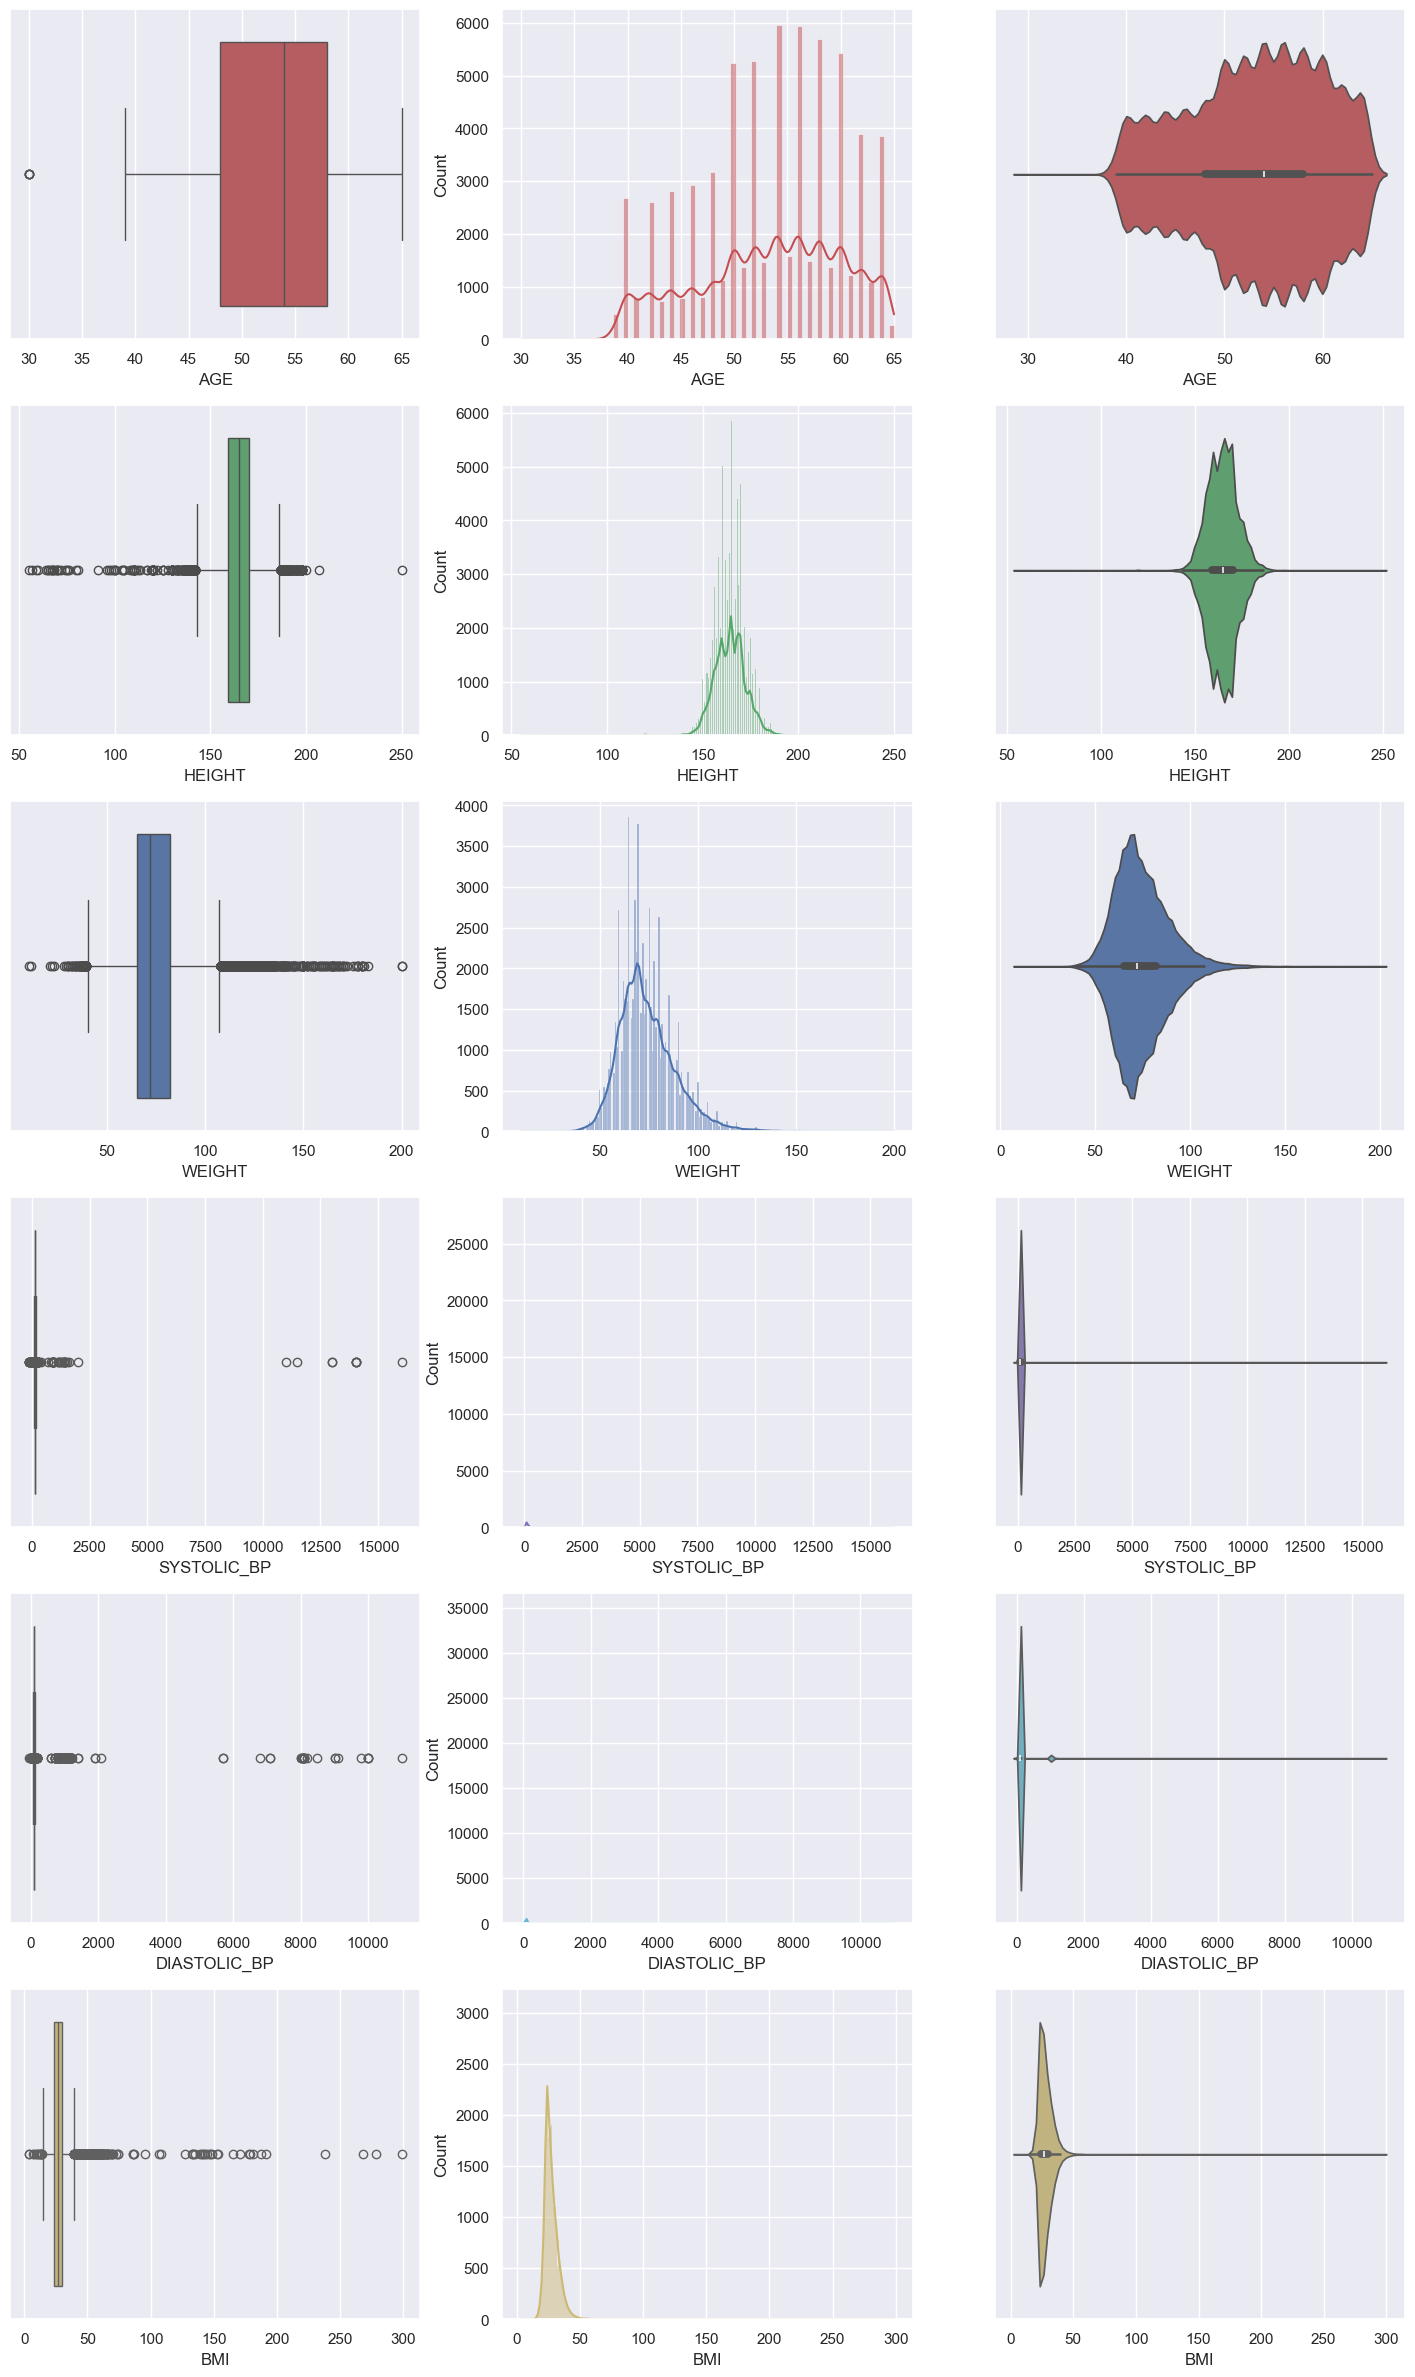

In [9]:
# Extract the numerical datas
numData = pd.DataFrame(cardioData[['AGE', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP','BMI']]) 
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y", "orange"]

count = 0
for var in numData:
    sb.boxplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=numData[var], color = colors[count], kde = True, ax = axes[count,1])
    sb.violinplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

### 1.5 Cleaning Data 

##### 1.5a Check if there are any missing values per column

In [10]:
df_cleaned = cardioData.copy()
print(df_cleaned.isnull().sum())

ID                   0
AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
SYSTOLIC_BP          0
DIASTOLIC_BP         0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICALLY ACTIVE    0
CARDIO_PATIENT       0
BMI                  0
dtype: int64


Number Of Missing Data : 0

##### 1.5b Check for any (Height/Weight) outliers in dataset 

In [11]:
print(df_cleaned[['HEIGHT', 'WEIGHT']].describe())

             HEIGHT        WEIGHT
count  70000.000000  70000.000000
mean     164.359229     74.205690
std        8.210126     14.395757
min       55.000000     10.000000
25%      159.000000     65.000000
50%      165.000000     72.000000
75%      170.000000     82.000000
max      250.000000    200.000000


In [12]:
outliers = df_cleaned[(df_cleaned['HEIGHT'] > 200) | (df_cleaned['WEIGHT'] > 200)]
print(outliers)

          ID  AGE  GENDER  HEIGHT  WEIGHT  SYSTOLIC_BP  DIASTOLIC_BP  \
6486    9223   58  Female     250    86.0          140           100   
21628  30894   52    Male     207    78.0          100            70   

             CHOLESTEROL GLUCOSE SMOKE ALCOHOL PHYSICALLY ACTIVE  \
6486   Well Above Normal  Normal    No      No               Yes   
21628             Normal  Normal    No     Yes               Yes   

      CARDIO_PATIENT        BMI  
6486             Yes  13.760000  
21628             No  18.203459  


Found 2 unrealistic heights from the data, need to remove from data

In [13]:
#removal of the 2 weird data
df_cleaned = df_cleaned.drop([6486, 21628])

In [14]:
#checking if outlier got removed
outliers = df_cleaned[(df_cleaned['HEIGHT'] > 200) | (df_cleaned['WEIGHT'] > 200)]
print(outliers)

Empty DataFrame
Columns: [ID, AGE, GENDER, HEIGHT, WEIGHT, SYSTOLIC_BP, DIASTOLIC_BP, CHOLESTEROL, GLUCOSE, SMOKE, ALCOHOL, PHYSICALLY ACTIVE, CARDIO_PATIENT, BMI]
Index: []


Removed outlier successfully

##### 1.5c Check for any (Systolic_BP/Diastolic_BP) outliers in dataset 

In [15]:
print(df_cleaned['SYSTOLIC_BP'].describe())
print(df_cleaned['DIASTOLIC_BP'].describe())

count    69998.000000
mean       128.817538
std        154.013575
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: SYSTOLIC_BP, dtype: float64
count    69998.000000
mean        96.630747
std        188.475196
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: DIASTOLIC_BP, dtype: float64


Remove negative and Filter Out Implausible High Values

In [16]:
df_cleaned = df_cleaned[(df_cleaned['SYSTOLIC_BP'] > 0) & (df_cleaned['DIASTOLIC_BP'] > 0)]
df_cleaned = df_cleaned[(df_cleaned['SYSTOLIC_BP'] < 200) & (df_cleaned['DIASTOLIC_BP'] < 120)]

Recheck for odd values for SYSTOLIC_BP and DIASTOLIC_BP

In [17]:
print(df_cleaned['SYSTOLIC_BP'].describe())
print(df_cleaned['DIASTOLIC_BP'].describe())

count    68583.000000
mean       126.100725
std         17.106687
min          7.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        197.000000
Name: SYSTOLIC_BP, dtype: float64
count    68583.000000
mean        81.113702
std          9.242344
min          1.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        119.000000
Name: DIASTOLIC_BP, dtype: float64


Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


##### 1.5d Check for spread of gender data in dataset 

In [18]:
# Check the unique values and their counts in the 'gender' column
print(df_cleaned['GENDER'].value_counts())

GENDER
Female    44705
Male      23878
Name: count, dtype: int64


##### 1.5e Check for any duplicates in dataset 

In [19]:
duplicates = df_cleaned.columns[df_cleaned.columns.duplicated()].tolist()
print("Duplicated columns:", duplicates)
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

Duplicated columns: []


##### 1.5f Finally we remove the ID column since it s not neccesary

In [20]:
if 'ID' in df_cleaned.columns:
    df_cleaned.drop("ID", axis=1, inplace=True)
else:
    print("Column 'id' does not exist in the DataFrame.")

# Check columns after drop
print(df_cleaned.columns)


Index(['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP',
       'CHOLESTEROL', 'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICALLY ACTIVE',
       'CARDIO_PATIENT', 'BMI'],
      dtype='object')


### AFTER CLEANING

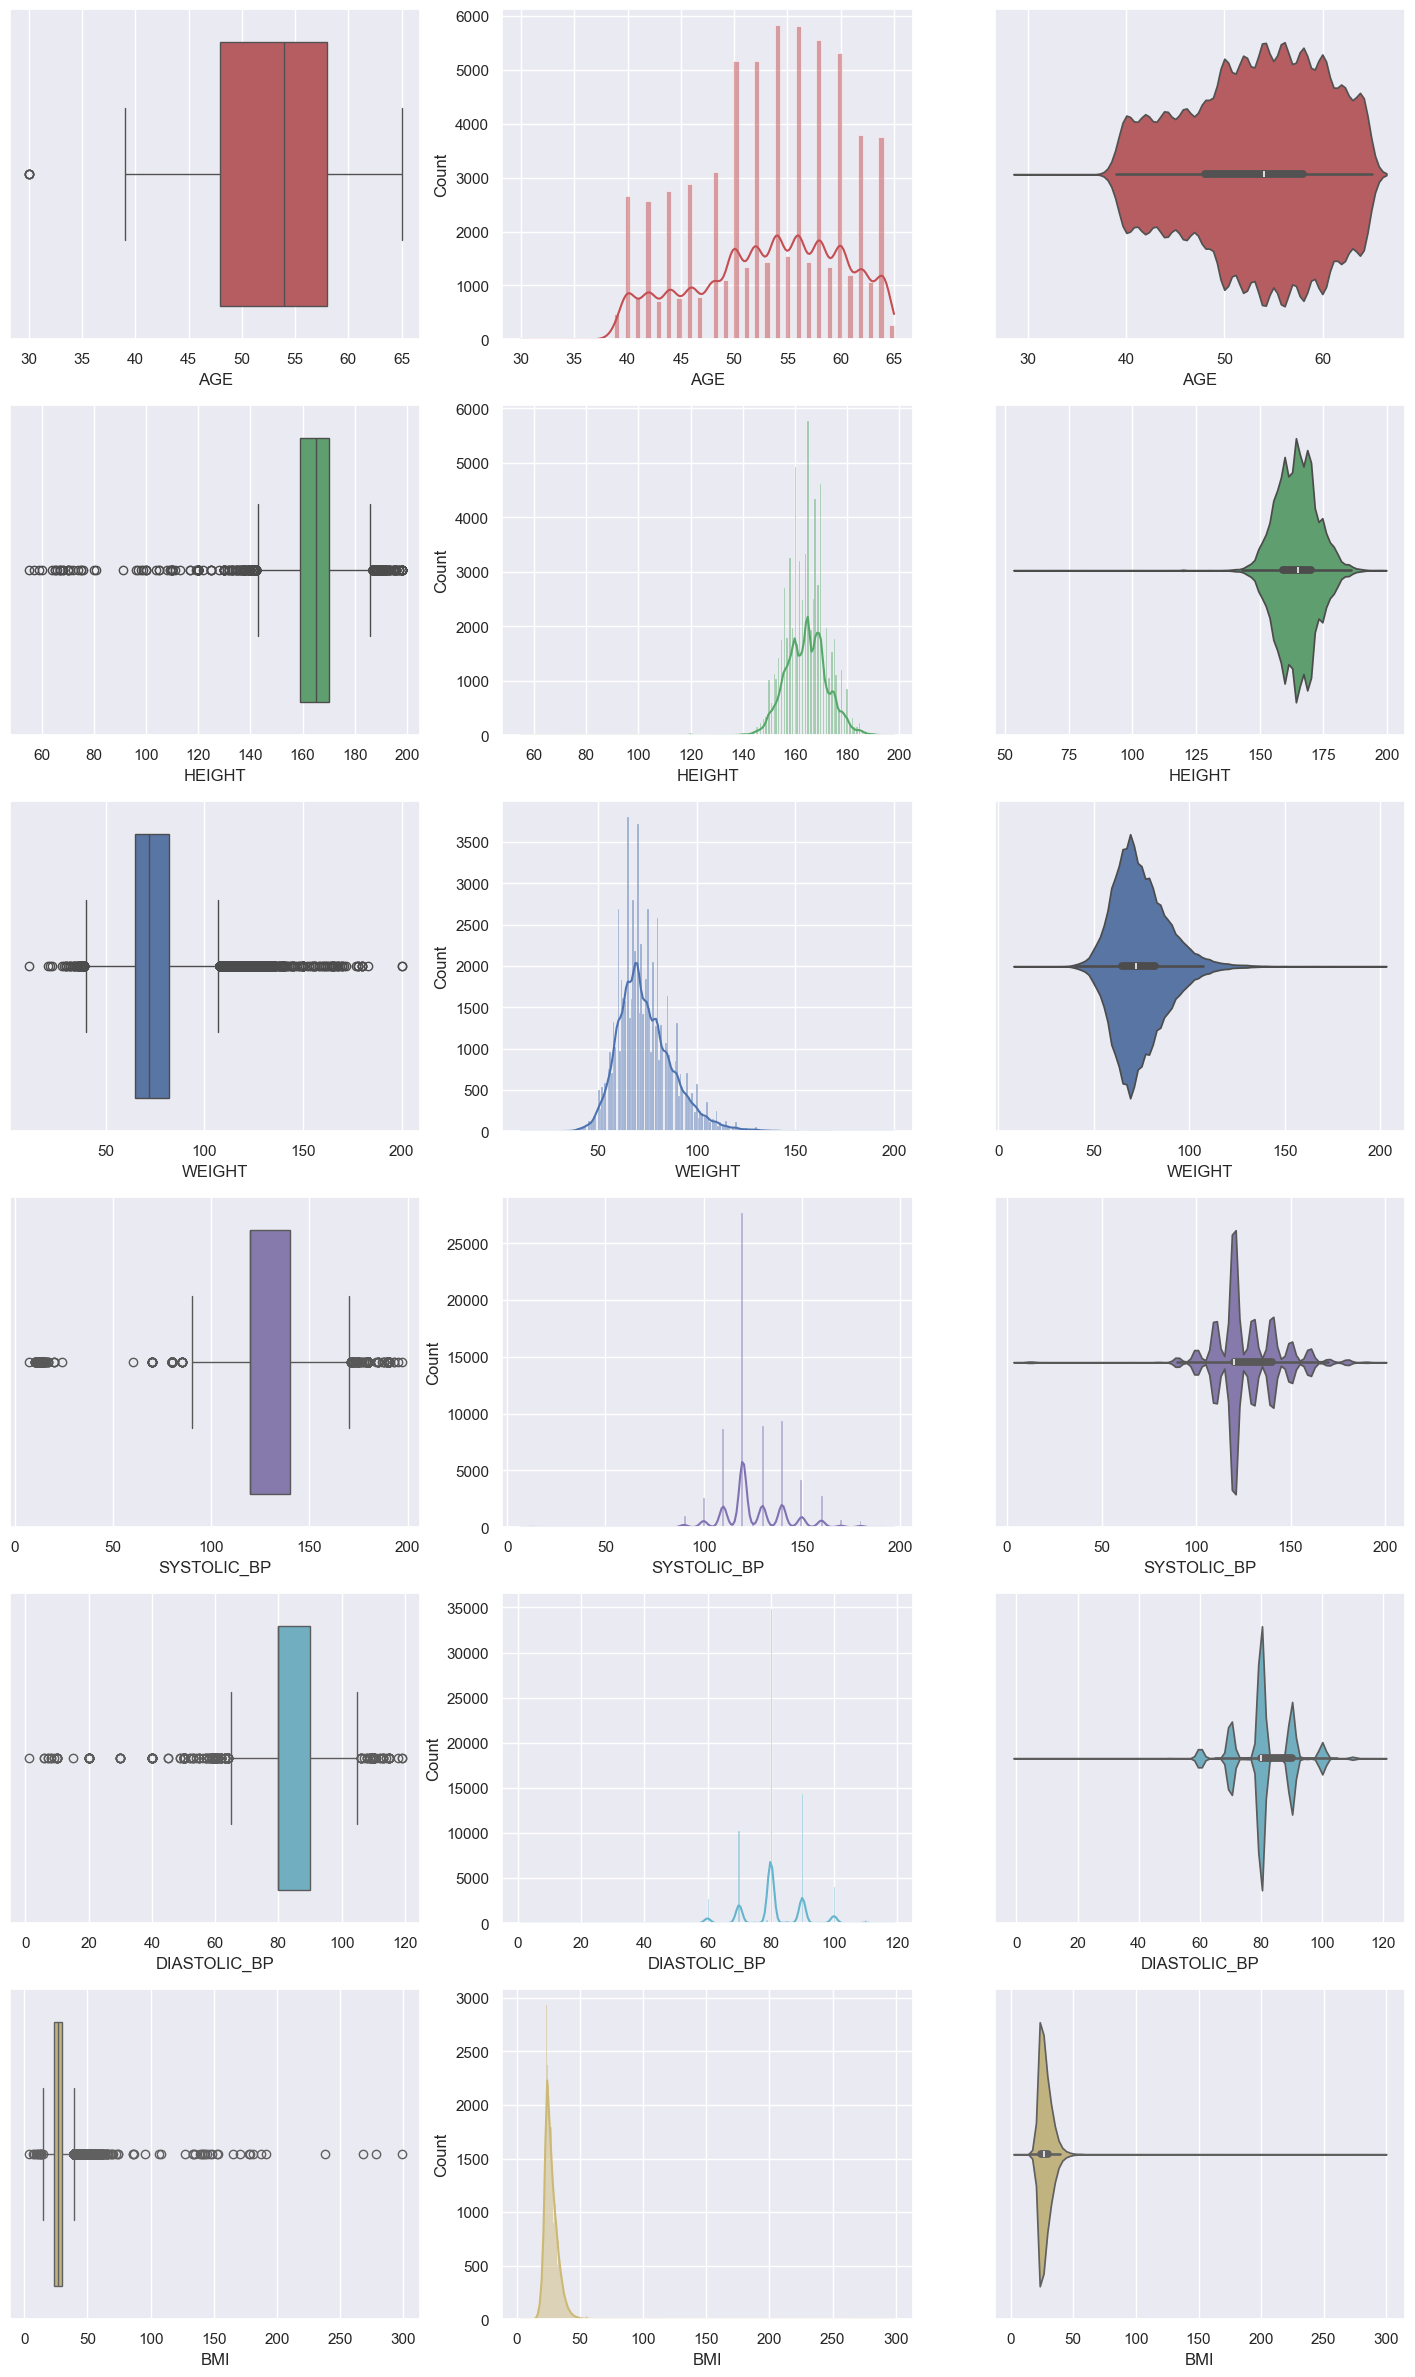

In [21]:
# Extract the numerical datas
numData = pd.DataFrame(df_cleaned[['AGE', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP','BMI']]) 
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y", "orange"]

count = 0
for var in numData:
    sb.boxplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=numData[var], color = colors[count], kde = True, ax = axes[count,1])
    sb.violinplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

In [22]:
numData.describe()

,AGE,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,BMI
count,68583.000000,68583.000000,68583.000000,68583.000000,68583.000000,68583.000000
mean,53.282577,164.359200,74.062504,126.100725,81.113702,27.502091
std,6.765501,8.186806,14.276094,17.106687,9.242344,6.040073
min,30.000000,55.000000,11.000000,7.000000,1.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.314635
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.116213
max,65.000000,198.000000,200.000000,197.000000,119.000000,298.666667


### 1.6 Categorising BMI and BP Levels into the known ranges in case we need to identify 

#### CATERGORISING BMI

In [23]:

# Define BMI bins and labels
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Categorize BMI
df_cleaned['BMI_Category'] = pd.cut(df_cleaned['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Reorder columns to place 'age', 'gender', 'weight', 'height', 'BMI' and 'BMI_Category' in front
columns_order = ['AGE', 'GENDER', 'WEIGHT', 'HEIGHT', 'BMI', 'BMI_Category'] + [col for col in df_cleaned.columns if col not in ['AGE', 'GENDER', 'WEIGHT', 'HEIGHT', 'BMI', 'BMI_Category']]
df_cleaned = df_cleaned[columns_order]

df_cleaned

,AGE,GENDER,WEIGHT,HEIGHT,BMI,BMI_Category,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICALLY ACTIVE,CARDIO_PATIENT
0,50,Male,62.0,168,21.967120,Normal weight,110,80,Normal,Normal,No,No,Yes,No
1,55,Female,85.0,156,34.927679,Obesity,140,90,Well Above Normal,Normal,No,No,Yes,Yes
2,52,Female,64.0,165,23.507805,Normal weight,130,70,Well Above Normal,Normal,No,No,No,Yes
3,48,Male,82.0,169,28.710479,Overweight,150,100,Normal,Normal,No,No,Yes,Yes
4,48,Female,56.0,156,23.011177,Normal weight,100,60,Normal,Normal,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Male,76.0,168,26.927438,Overweight,120,80,Normal,Normal,Yes,No,Yes,No
69996,62,Female,126.0,158,50.472681,Obesity,140,90,Above Normal,Above Normal,No,No,Yes,Yes
69997,52,Male,105.0,183,31.353579,Obesity,180,90,Well Above Normal,Normal,No,Yes,No,Yes
69998,61,Female,72.0,163,27.099251,Overweight,135,80,Normal,Above Normal,No,No,No,Yes


#### CATEGORISING BP LEVELS

In [24]:
# Function to categorize blood pressure
def categorize_blood_pressure(row):
    systolic = row['SYSTOLIC_BP']
    diastolic = row['DIASTOLIC_BP']
    
    
    if systolic >= 180 or diastolic >= 120:
        return 'Hypertensive Crisis'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Hypertension Stage 1'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif systolic < 120 and diastolic < 80:
        return 'Normal'
    else:
        return 'Unknown'  # Catch-all for unexpected values
# Apply the function to each row in the DataFrame
df_cleaned['BP_Category'] = df_cleaned.apply(categorize_blood_pressure, axis=1)

df_cleaned

,AGE,GENDER,WEIGHT,HEIGHT,BMI,BMI_Category,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICALLY ACTIVE,CARDIO_PATIENT,BP_Category
0,50,Male,62.0,168,21.967120,Normal weight,110,80,Normal,Normal,No,No,Yes,No,Hypertension Stage 1
1,55,Female,85.0,156,34.927679,Obesity,140,90,Well Above Normal,Normal,No,No,Yes,Yes,Hypertension Stage 2
2,52,Female,64.0,165,23.507805,Normal weight,130,70,Well Above Normal,Normal,No,No,No,Yes,Hypertension Stage 1
3,48,Male,82.0,169,28.710479,Overweight,150,100,Normal,Normal,No,No,Yes,Yes,Hypertension Stage 2
4,48,Female,56.0,156,23.011177,Normal weight,100,60,Normal,Normal,No,No,No,No,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Male,76.0,168,26.927438,Overweight,120,80,Normal,Normal,Yes,No,Yes,No,Hypertension Stage 1
69996,62,Female,126.0,158,50.472681,Obesity,140,90,Above Normal,Above Normal,No,No,Yes,Yes,Hypertension Stage 2
69997,52,Male,105.0,183,31.353579,Obesity,180,90,Well Above Normal,Normal,No,Yes,No,Yes,Hypertensive Crisis
69998,61,Female,72.0,163,27.099251,Overweight,135,80,Normal,Above Normal,No,No,No,Yes,Hypertension Stage 1


##  2. Exploratory Data Analysis

### 2.1 Analysing Numerical Variables.

#### 2.1a Plotting BoxPlot to observe relationship

<Axes: xlabel='CARDIO_PATIENT', ylabel='DIASTOLIC_BP'>

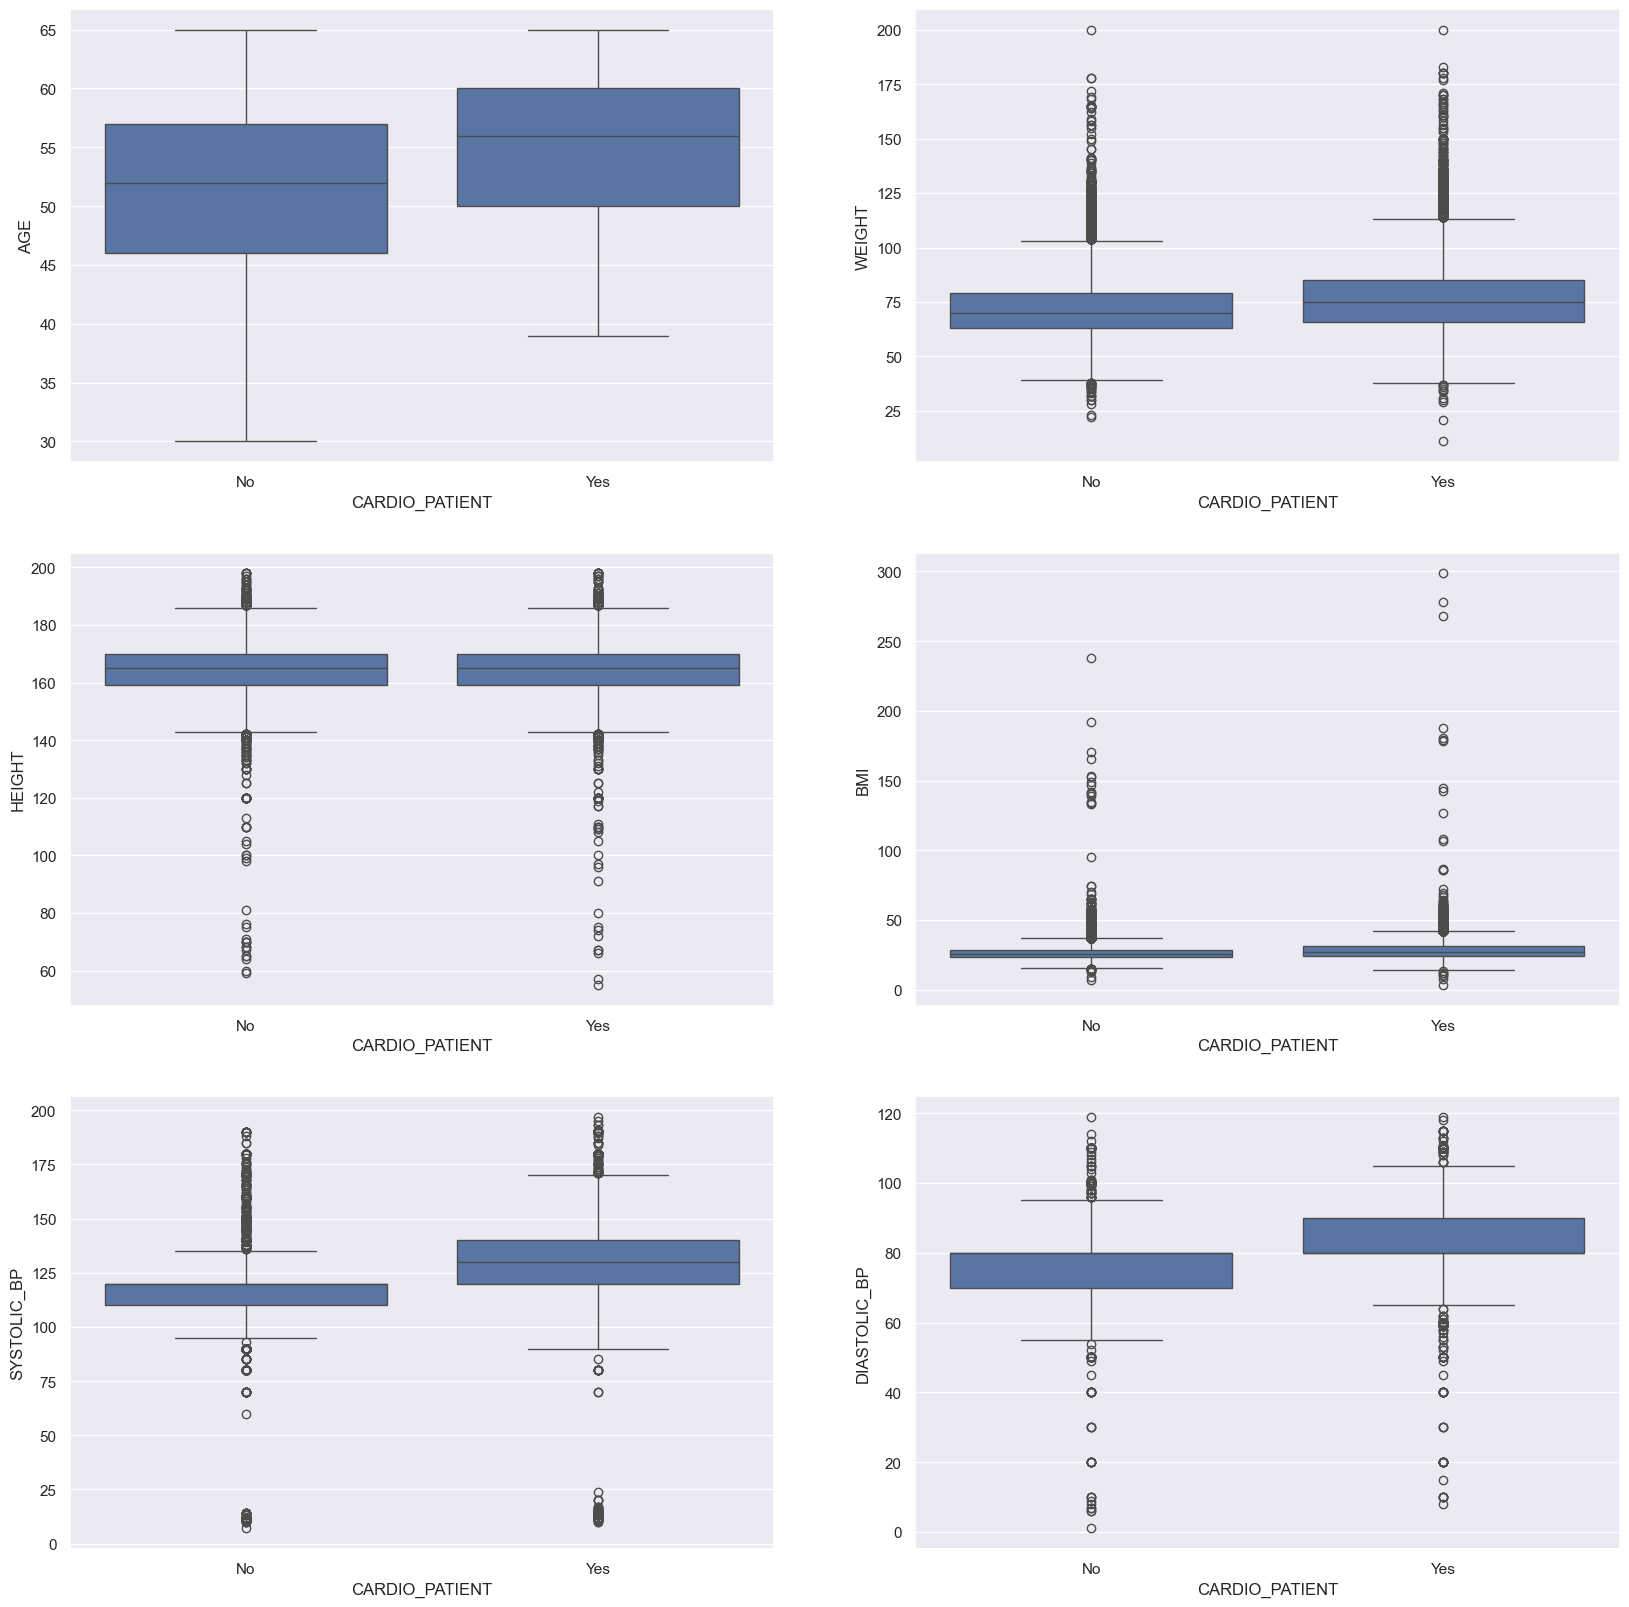

In [25]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))

sb.boxplot(x = 'CARDIO_PATIENT', y = 'AGE', data = df_cleaned, ax=axes[0,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'WEIGHT', data = df_cleaned, ax=axes[0,1])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'HEIGHT', data = df_cleaned, ax=axes[1,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'BMI', data = df_cleaned, ax=axes[1,1])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'SYSTOLIC_BP', data = df_cleaned, ax=axes[2,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'DIASTOLIC_BP', data = df_cleaned, ax=axes[2,1])

From the Boxplots, we can conclude Age, Weight, BMI, SYSTOLIC_BP and DIASTOLIC_BP are key factor link to Cardio_Patient

#### 2.1b Use Correlation Matrix to confirm the relationship of the variables

In [27]:
# Extract the numerical datas
numvars = pd.DataFrame(df_cleaned[['CARDIO_PATIENT','AGE', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP','BMI']]) 
print(numvars.corr())

ValueError: could not convert string to float: 'No'

ValueError: could not convert string to float: 'No'

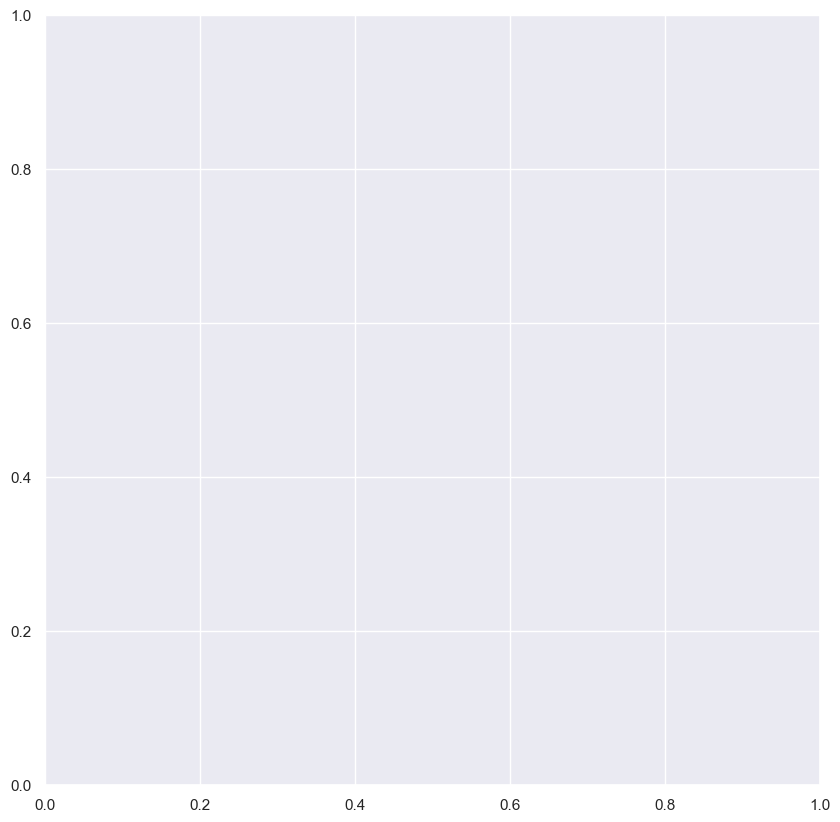

In [28]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(numvars.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From this heatmap, we can conclude that Systolic BP, Diastolic BP and  Age are slightly positively correlated to Cardio_Patient

### CONCLUSION FOR NUMERICAL VARIABLES: 
SYSTOLIC _BP, DIASTOLIC_BP and AGE are the most effective in predicting CARDIO_PATIENT amongst the numerical datas

### 2.2 Analysing Categorical Data

#### 2.2a  Category Plot to Visualize all the Categorical Data and observe the distribution of data

In [ ]:
sb.catplot(y="GENDER", hue="GENDER", data=df_cleaned, kind="count", palette="Greens", height=5, aspect=1.5, legend=False)
sb.catplot(y="CHOLESTEROL", hue="CHOLESTEROL", data=df_cleaned, kind="count", palette="Set2", height=5, aspect=1.5, legend=False)
sb.catplot(y="GLUCOSE", hue="GLUCOSE", data=df_cleaned, kind="count", palette="YlGn", height=5, aspect=1.5, legend=False)
sb.catplot(y="SMOKE", hue="SMOKE", data=df_cleaned, kind="count", palette="YlOrRd", height=5, aspect=1.5, legend=False)
sb.catplot(y="ALCOHOL", hue="ALCOHOL", data=df_cleaned, kind="count", palette="PuBuGn", height=5, aspect=1.5, legend=False)
sb.catplot(y="PHYSICALLY ACTIVE", hue="PHYSICALLY ACTIVE", data=df_cleaned, kind="count", palette="BuGn", height=5, aspect=1.5, legend=False)
sb.catplot(y="CARDIO_PATIENT", hue="CARDIO_PATIENT", data=df_cleaned, kind="count", palette="RdPu", height=5, aspect=1.5, legend=False)


# Plot for BMI Category
sb.catplot(x="BMI_Category", hue="CARDIO_PATIENT", data=df_cleaned, kind="count", palette="Oranges", height=5, aspect=1.5)
plt.title("Distribution of Cardio Patient by BMI Category")
plt.show()

# Plot for BP Category
sb.catplot(x="BP_Category", hue="CARDIO_PATIENT", data=df_cleaned, kind="count", palette="Blues", height=5, aspect=1.5)
plt.title("Distribution of Cardio Patient by BP Category")
plt.show()

Based on the cat plots we can see most of them are imbalance.
to make it easier for us to identify the influence of the cat plots, we shall use contingency table to identify the spread of variable against the CARDIO_PATIENT

#### 2.2b Using Contingency table to identify the distribution of the categorical variables

In [ ]:
#make a function to plot contingency tables for categorical variables vs target variable
def plot_annotated_contingency_tables(data, categorical_vars, target_var):
    for col in categorical_vars:
        contingency_table = pd.crosstab(data[col], data[target_var])
        plt.figure(figsize=(8, 6))
        sb.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'{col} vs {target_var} Contingency Table')
        plt.xlabel(target_var)
        plt.ylabel(col)
        plt.show()

# Plot annotated contingency tables for each categorical variable vs 'cardio'
plot_annotated_contingency_tables(df_cleaned, catvars[:-1], 'CARDIO_PATIENT')  # Exclude 'cardio' itself


Both smokers and non-smokers have similar rates of cardiovascular disease, with a slight decrease in heart disease cases among smokers. Smoking doesn’t show a strong association with heart disease in this dataset.
Alcohol consumption shows nearly equal rates of heart disease among drinkers and non-drinkers, with non-drinkers having a slightly higher percentage of cardio = 1. Alcohol is not a clear predictor of heart disease in this dataset.
There’s only a very slight difference in cardiovascular disease incidence between genders, with gender 2 having a marginally higher rate of cardio = 1. Gender alone isn’t a strong differentiator for heart disease in this dataset.
Physical inactivity is associated with a slightly higher incidence of heart disease. Individuals who are inactive show a higher percentage of cardio = 1 compared to those who are active, making activity level a moderate indicator of cardiovascular risk.
Elevated glucose levels correlate with a higher likelihood of cardiovascular disease. As glucose levels increase, so does the percentage of individuals with cardio = 1. Glucose level is a potential risk factor for heart disease.
Higher cholesterol levels correlate with a higher incidence of cardiovascular disease. Individuals with the highest cholesterol level (cholesterol = 3) have the highest percentage of cardio = 1. Cholesterol level is likely a strong indicator of heart disease risk.

#### 2.2c Using the categorised levels of BMI and BP to see if new observations can be made

##### Make a cat plot of BMI Category distribution 

In [ ]:
# Define a function to add integer labels to the bars
def add_labels(ax):
    # Loop over the bars in the axes
    for p in ax.patches:
        # Get the height of each bar
        height = p.get_height()
        # Set the text label as the integer value of the height
        ax.annotate(int(height),  # Convert to int for clean labeling
                    (p.get_x() + p.get_width() / 2., height),  # Position of the label
                    ha='center', va='bottom')  # Horizontal and vertical alignment

# Catplot for BMI_Category vs CARDIO_PATIENT with labels
g = sb.catplot(x="BMI_Category", hue="CARDIO_PATIENT", data=df_cleaned, kind="count", palette="pastel", height=5, aspect=1.5)
g.set_axis_labels('BMI Category', 'Count')
plt.title('Cardio Patient Distribution by BMI Category')
add_labels(g.ax)
plt.show()


<br>The low counts here suggest that being underweight is relatively uncommon in this dataset, and there is minimal association with cardiovascular disease in this group.
<br>Although cardiovascular disease cases are present, the higher count for CARDIO_PATIENT = No suggests that individuals with a normal BMI are less likely to have cardiovascular disease compared to those in higher BMI categories.
<br>This balanced distribution indicates that overweight individuals are at a roughly equal risk of having or not having cardiovascular disease. It suggests a stronger association between being overweight and cardiovascular disease compared to normal weight.
<br>This significant increase in CARDIO_PATIENT = Yes cases for obese individuals suggests a strong association between obesity and cardiovascular disease. Obese individuals in this dataset are more likely to have cardiovascular disease than not.

##### Use Chi-Sq to determine the significance of BMI Category


In [ ]:
from scipy.stats import chi2_contingency

data = {
    'No': [465, 14811, 12642, 6846],  # Counts for CARDIO_PATIENT = No
    'Yes': [175, 9643, 12776, 11225]  # Counts for CARDIO_PATIENT = Yes
}
# Define BMI categories as row labels
bmi_df = pd.DataFrame(data, index=['Normal weight', 'Overweight', 'Obesity', 'Underweight'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(bmi_df)

print("Chi-Square Statistic for BMI Categories:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

<br>Chi-Square Statistic: 2,272.83, which is a large value, suggesting a strong difference between the observed and expected frequencies. This indicates a likely association between BMI categories and cardiovascular disease.
<br>P-Value: 0.0, which is much smaller than 0.05, meaning we reject the null hypothesis. There is a statistically significant association between BMI categories and cardiovascular disease.
<br>Degrees of Freedom: 3, implying there were four BMI categories.
<br>The chi-square test results indicate a statistically significant association between BMI categories and cardiovascular disease. 
<br>This suggests that cardiovascular disease prevalence varies meaningfully across different BMI categories, with higher BMI categories (e.g., Overweight and Obesity) likely having a stronger association with cardiovascular disease compared to lower BMI categories

##### Make a cat plot for BP_Category Distribution

In [ ]:
# Define the correct order for blood pressure categories
bp_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']

# Catplot for BP_Category vs CARDIO_PATIENT with labels, specifying the order
g = sb.catplot(x="BP_Category", hue="CARDIO_PATIENT", data=df_cleaned, kind="count", 
               palette="pastel", height=5, aspect=1.5, order=bp_order)

g.set_axis_labels('Blood Pressure Category', 'Count')
plt.title('Cardio Patient Distribution by Blood Pressure Category')

# Adding labels
add_labels(g.ax)
plt.show()


##### Use Chi-Sq to determine the significance of BP_Level Category

In [ ]:

from scipy.stats import chi2_contingency

data = {
    'No': [7469, 2131, 20035, 5067, 81],  # Counts for CARDIO_PATIENT = No
    'Yes': [0, 2112, 12520, 17569, 589]   # Counts for CARDIO_PATIENT = Yes
}
# Define BMI categories as row labels
bp_df = pd.DataFrame(bp_data, index=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(bp_df)

print("Chi-Square Statistic for BP Levels:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

<br>Chi-Square Statistic: 16,449.48, a very large value that points to a strong difference between observed and expected frequencies, suggesting a significant association.
<br>P-Value: 0.0, well below 0.05, meaning we reject the null hypothesis. This indicates a statistically significant association between BP levels and cardiovascular disease.
<br>Degrees of Freedom: 4, corresponding to the five BP categories.
<br>The chi-square test results reveal a statistically significant association between BP levels and cardiovascular disease. 
<br>The large chi-square statistic and low p-value indicate that cardiovascular disease prevalence varies meaningfully across BP categories, with higher BP levels (such as Hypertension Stage 1, Stage 2, and Hypertensive Crisis) showing a stronger association with cardiovascular disease.

### CONCLUSION FOR CATEGORICAL DATA: Glucose, Cholesterol,BMI_Category for (Overweight, Obesity), BP_Level (At Hypertension Stages and above) are useful in predicting whether one has cardio vascular disease

### 2.3 Distribution of Key Features using Histogram

In [ ]:
# Assuming df_cvd is defined as:
# df_cvd = df_cleaned[df_cleaned['CARDIO_PATIENT'] == 1]

# Plotting histograms for Age, Systolic BP, BMI, and Weight for cardiovascular patients in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age histogram
sb.histplot(df_cleaned['AGE'], bins=20, kde=True, ax=axes[0, 0], color='purple')
axes[0, 0].set_title('Age Distribution of Cardiovascular Patients')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Systolic BP histogram
sb.histplot(df_cleaned['SYSTOLIC_BP'], bins=np.linspace(50, 200, 20), kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_xlim(50, 200)
axes[0, 1].set_title('Systolic BP Distribution of Cardiovascular Patients')
axes[0, 1].set_xlabel('Systolic BP')
axes[0, 1].set_ylabel('Frequency')

# BMI histogram
sb.histplot(df_cleaned['BMI'], bins=np.linspace(0, 80, 10), kde=True, ax=axes[0, 2], color='green')
axes[0, 2].set_xlim(0, 80)
axes[0, 2].set_title('BMI Distribution of Cardiovascular Patients')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Frequency')

# Weight histogram
sb.histplot(df_cleaned['WEIGHT'], bins=np.linspace(0, 200, 20), kde=True, ax=axes[1, 0], color='Blue')
axes[1, 0].set_xlim(0, 200)
axes[1, 0].set_title('Weight Distribution of Cardiovascular Patients')
axes[1, 0].set_xlabel('Weight')
axes[1, 0].set_ylabel('Frequency')

# Dystolic BP histogram
sb.histplot(df_cleaned['DIASTOLIC_BP'], bins=np.linspace(50, 120, 20), kde=True, ax=axes[1, 1], color='brown')
axes[1, 1].set_xlim(50, 120)
axes[1, 1].set_title('Diastolic BP Distribution of Cardiovascular Patients')
axes[1, 1].set_xlabel('Diastolic BP')
axes[1, 1].set_ylabel('Frequency')


# Adjust layout and display
plt.tight_layout()
plt.show()

### 2.4 Boxplots by feature categories

Each row corresponds to a continuous variable and each column corresponds to a different categorical variable

In [ ]:
# List of continuous variables to be analyzed
continuous_vars = ['AGE', 'WEIGHT', 'BMI', 'SYSTOLIC_BP', 'DIASTOLIC_BP']

# List of categorical features to group by (cholesterol, glucose, etc.)
categorical_vars = ['CHOLESTEROL', 'GLUCOSE', 'BP_Category', 'GENDER', 'SMOKE', 'ALCOHOL', 'PHYSICALLY ACTIVE']

# Set up the figure size
plt.figure(figsize=(20, 30))

# Loop through continuous variables
for i, cont_var in enumerate(continuous_vars):
    # For each continuous variable, plot it against all categorical variables
    for j, cat_var in enumerate(categorical_vars):
        ax = plt.subplot(len(continuous_vars), len(categorical_vars), i * len(categorical_vars) + j + 1)
        
        # Plot boxplots for each pair of continuous and categorical variables
        sb.boxplot(x=cat_var, y=cont_var, data=df_cleaned, ax=ax)
        
        # Set a y-axis limit only for BMI to improve visibility
        if cont_var == 'BMI':
            ax.set_ylim(0, 80)  # Adjust limit as necessary for BMI

        if cont_var == 'DIASTOLIC_BP':
            ax.set_ylim(40, 120)  # Minimum set to 40, maximum to 120 for DIASOLIC_BP

        if cont_var == 'SYSTOLIC_BP':
            ax.set_ylim(60, 200)  # Minimum set to 40, maximum to 120 for DIASOLIC_BP
        
        # Set title and rotate x labels
        plt.title(f'{cont_var} by {cat_var}', fontsize=10)
        plt.xticks(rotation=45, ha='right')

# Use tight_layout to ensure plots fit well
plt.tight_layout()
plt.show()

From the box plot above, we have concluded:
Age, Weight, and BMI seem to correlate with higher cholesterol, glucose levels, and blood pressure categories, suggesting that as these metabolic markers increase, so do weight and blood pressure, which is consistent with the risk factors for cardiovascular disease.

Systolic and Diastolic BP are clearly differentiated by BP Category, with higher BP categories (Hypertension Stages and Crisis) associated with significantly higher blood pressure readings.

Gender shows slight differences in weight and BMI, with gender 2 (likely males) being heavier and having a higher BMI compared to gender 1 (likely females). There are also slight differences in systolic BP.

Smoking, Alcohol, and Physically Activity: No major trends across these categories in relation to the continuous variables, though there are more outliers in the smoking and alcohol groups.

## 3. Machine Learning Models

### 1) XGBoost 
helps to identify important variables based on its feature importance scores


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split


def check(X_train_train, X_train_val, y_train_train, y_train_val):

    model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42, colsample_bytree=0.8)

    # Fit the model to the training data
    model.fit(X_train_train, y_train_train)

    # Make predictions on the training and validation data
    y_train_pred = model.predict(X_train_train)
    y_val_pred = model.predict(X_train_val)

    # Calculate accuracy on the training and validation data
    train_acc = accuracy_score(y_train_train, y_train_pred)
    val_acc = accuracy_score(y_train_val, y_val_pred)

    # Return the accuracy scores
    return train_acc, val_acc

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[['AGE', 'CHOLESTEROL', 'SYSTOLIC_BP', 'DIASTOLIC_BP' , 'BMI']], df_cleaned['CARDIO_PATIENT'], test_size=0.2, random_state=69)
xgb = XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=50, random_state=42, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the performance of the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define a parameter grid for the XGBoost model
# Including hyperparameters to increase the accuracy of the model, and to reduce overfitting
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# # Create an instance of the GridSearchCV class
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

#### Feature Importance from XGBoost

In [ ]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

From the Plot, we can tell that:

•BMI is the most important feature:
    BMI has the highest feature importance with an importance score of 201.0
    This suggests that the model relies heavily on BMI to make predictions about cardiovascular disease, implying that BMI plays a significant role in 
    determining cardiovascular risk.
    
•Age is the second most important feature:
    Age is the next most important feature with an importance score of 182.0. Given that cardiovascular disease risk generally increases with age, it's
    not surprising that age contributes heavily to the model's predictions.
    The high importance of age indicates that it is a key factor the model considers when predicting cardiovascular disease.
    
•Systolic Blood Pressure (SYSTOLIC_BP) also plays a significant role:
    High systolic blood pressure is a well-known risk factor for cardiovascular diseases with an importance score of 150.0, so its importance in the 
    model suggests that the data reflects this medical fact.
    This feature contributes substantially to the model’s ability to predict outcomes.

•Diastolic Blood Pressure (DIASTOLIC_BP) has moderate importance:
    Diastolic blood pressure has a moderate importance score with an importance score of 95.0, indicating it is still an important feature, though not
    as critical as systolic blood pressure, BMI, or age.
    It shows that while diastolic pressure is considered, it might not be as strong a predictor in this dataset compared to the others.

•Cholesterol has relatively lower importance:
    While cholesterol is a known risk factor for cardiovascular disease, it has the lowest importance among the five features with an importance score
    of 68.0. 
    This could mean: the model relies less on cholesterol for prediction.
    There might be less variation in cholesterol levels within the dataset, or the cholesterol values might be highly correlated with other features,
    causing the model to prefer those other features.

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


### 2)  Random Forest
validate those important features by retraining the model with only these features and checking if it achieves high accuracy or performance


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Detailed classification report
print(classification_report(y_test, y_rf_pred))

ValueError: could not convert string to float: 'Normal'

The Random Forest model is performing well with 85% accuracy, meaning it's correctly classifying most instances in the test set.
The precision, recall, and F1-scores are quite balanced between the two classes (class 0 and class 1), which is a sign of a well-performing model.

Key Insights:

•Accuracy: The Random Forest model has an accuracy of 73.28%. 

•Class 0 (No Cardiovascular Disease):
The model performs better for predicting class 0 (no cardiovascular disease), with a recall of 0.79 (79%). This means the model correctly identifies 79% of the individuals who do not have cardiovascular disease.
The precision for class 0 is 0.71 (71%), indicating that among all instances predicted as class 0, 71% were correct.

•Class 1 (Cardiovascular Disease):
The recall for class 1 (cardiovascular disease) is 0.67 (67%), which means the model is missing around 33% of true cases. This could be important, depending on the real-world application of your model.
The precision for class 1 is 0.76 (76%), meaning that when the model predicts cardiovascular disease, it is correct 76% of the time.

•Balanced Performance:
The macro average and weighted average for precision, recall, and F1-score are all around 0.73 (73%), indicating that the model's performance is fairly balanced between both classes.

### 3) Logic Regression
offers interpretability by showing how much each feature contributes (using coefficients) and whether they are statistically significant for prediction


In [32]:
def check_logistic(X_train_train, X_train_val, y_train_train, y_train_val):
    # Create and fit the Logistic Regression model
    log_reg = LogisticRegression(max_iter=100, random_state=42)
    log_reg.fit(X_train_train, y_train_train)

    # Make predictions on the training and validation data
    y_train_pred = log_reg.predict(X_train_train)
    y_val_pred = log_reg.predict(X_train_val)

    # Calculate accuracy on the training and validation data
    train_acc = accuracy_score(y_train_train, y_train_pred)
    val_acc = accuracy_score(y_train_val, y_val_pred)

    # Return the accuracy scores and the trained model
    return train_acc, val_acc, log_reg

# Call the function and get the model
train_acc, val_acc, log_reg = check_logistic(X_train_train, X_train_val, y_train_train, y_train_val)
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


NameError: name 'X_train_train' is not defined

In [33]:
# Retrain the model on the full training set
final_model = LogisticRegression(max_iter=100, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_acc)


NameError: name 'LogisticRegression' is not defined

The Logic Regression model achieved a training accuracy of 72.12% and a validation accuracy of 71.56%, indicating moderate effectiveness in predicting cardiovascular disease.

### Key Insights:

- Accuracy: The Logic Regression model shows an accuracy of approximately 71.5% on the validation set, suggesting that it captures some predictive patterns in the data, though there is room for further improvement.

- Class 0 (No Cardiovascular Disease): The model performs better in predicting individuals without cardiovascular disease, with a recall of 0.75 (75%). This means the model correctly identifies 75% of individuals who do not have cardiovascular disease. The precision for Class 0 is around 0.70 (70%), indicating that among all instances predicted as "No Cardiovascular Disease," 70% were correct.

- Class 1 (With Cardiovascular Disease): The recall for Class 1 is slightly lower at 0.68 (68%), suggesting that the model misses about 32% of true cases with cardiovascular disease. However, the precision for Class 1 is 0.74 (74%), meaning that when the model predicts cardiovascular disease, it is correct 74% of the time. This could be critical in applications where accurately identifying disease cases is a priority.

- Balanced Performance: The macro and weighted averages for precision, recall, and F1-score are all close to 0.72 (72%), indicating that the model’s performance is fairly balanced across both classes, though slightly more reliable in predicting "No Cardiovascular Disease."

### Summary:

The Logic Regression model, through its use of interaction terms, provides interpretability while performing moderately well in distinguishing between individuals with and without cardiovascular disease. While the model is reasonably effective, particularly in identifying Class 0 cases, further refinement could improve its sensitivity to Class 1 cases, which is important for applications focused on disease detection.

### 4) Decision Tree (ignore)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming your DataFrame is named df_cleaned and 'CARDIO_PATIENT' is the target variable
# Define features (X) and target (y)
X = df_cleaned[['BMI', 'DIASTOLIC_BP','SYSTOLIC_BP', 'AGE', 'CHOLESTEROL' ]]
y = df_cleaned['CARDIO_PATIENT']

# Encode categorical variables if not already numerical
X = pd.get_dummies(X, drop_first=True)  # Use one-hot encoding if needed

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dectree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)

# Train the model on the training data
dectree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Feature Importances:
 SYSTOLIC_BP                      0.787667
AGE                              0.131949
CHOLESTEROL_Well Above Normal    0.074995
BMI                              0.005389
DIASTOLIC_BP                     0.000000
CHOLESTEROL_Normal               0.000000
dtype: float64


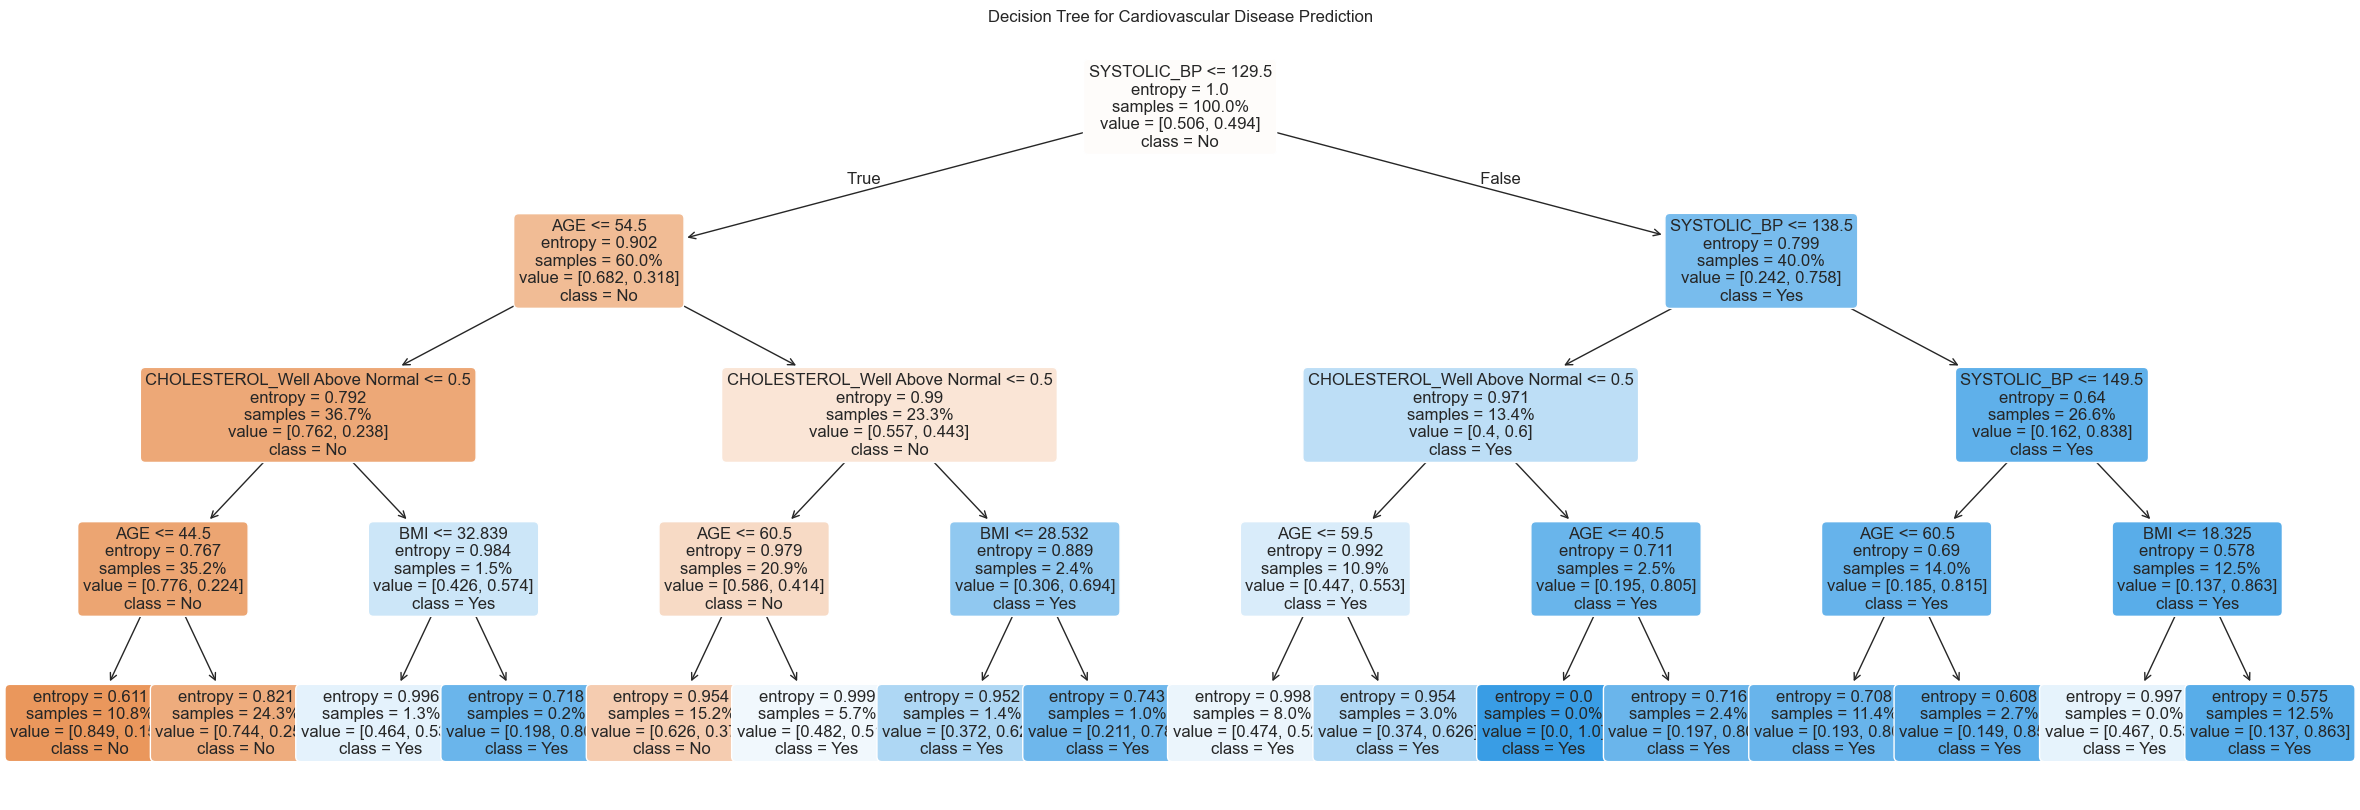

In [35]:
# Print feature importances
feature_importances = pd.Series(dectree.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Visualize the decision tree
plt.figure(figsize=(30, 10))
tree.plot_tree(
    dectree,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True
)
plt.title("Decision Tree for Cardiovascular Disease Prediction")
plt.show()

<br>Systolic Blood Pressure is the strongest predictor of cardiovascular disease in this model, with splits around values of 129.5, 138.5, and 149.5.
<br>Age and Cholesterol are important secondary predictors. Higher values for both tend to increase the likelihood of cardiovascular disease.
<br>BMI plays a minor role, but extreme values in certain pathways influence predictions.
<br>Overall, this decision tree indicates that cardiovascular disease risk is primarily associated with elevated systolic blood pressure, followed by age, cholesterol, and, to a lesser extent, BMI. Individuals with high systolic blood pressure and advanced age or high <br>cholesterol levels are at the greatest risk of being classified as having cardiovascular disease.

In [44]:
# Make predictions on the test set
y_pred = dectree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7261239368165249
              precision    recall  f1-score   support

          No       0.73      0.73      0.73     10455
         Yes       0.72      0.72      0.72     10120

    accuracy                           0.73     20575
   macro avg       0.73      0.73      0.73     20575
weighted avg       0.73      0.73      0.73     20575

Confusion Matrix:
 [[7603 2852]
 [2783 7337]]


Accuracy: 0.7261239368165249
              precision    recall  f1-score   support

          No       0.73      0.73      0.73     10455
         Yes       0.72      0.72      0.72     10120

    accuracy                           0.73     20575
   macro avg       0.73      0.73      0.73     20575
weighted avg       0.73      0.73      0.73     20575



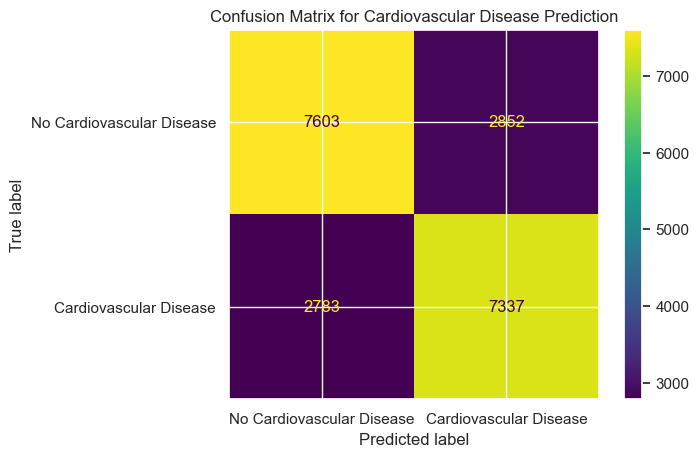

In [45]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = dectree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dectree, X_test, y_test, display_labels=["No Cardiovascular Disease", "Cardiovascular Disease"])
plt.title("Confusion Matrix for Cardiovascular Disease Prediction")
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(name, model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Print results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*40 + "\n")
    
    # Return results as a dictionary for easy comparison
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }


In [42]:
# Initialize models (assuming you've already trained these)
# Logistic Regression, Random Forest, and XGBoost
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb
}

# Evaluate each model
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_test, y_test))


NameError: name 'log_reg' is not defined

### 5)Testing SVM Model (ignore)

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the SVM model (with a linear kernel, you can change it to 'rbf', 'poly', etc.)
svm_model = SVC(kernel='linear', random_state=69)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print out the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
